# Feature Scalling

In [1]:
from sklearn.preprocessing import StandardScaler

# Sample data
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
# Initialize the StandardScaler
scaler = StandardScaler()
# Fit and transform the data
scaled_data = scaler.fit_transform(data) # Provide the answer in the form of numpy array
# Print the scaled data
print(scaled_data)

[[-1.18321596 -1.18321596]
 [-0.50709255 -0.50709255]
 [ 0.16903085  0.16903085]
 [ 1.52127766  1.52127766]]


In [6]:
import pandas as pd
df = pd.DataFrame(
    {
        "A": [1, 2, 3, 4, 5],
        "B": [6, 7, 8, 9, 10],
        "C": [11, 12, 13, 14, 15],
    }
)
scaler = StandardScaler()
pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

,A,B,C
0,-1.414214,-1.414214,-1.414214
1,-0.707107,-0.707107,-0.707107
2,0.000000,0.000000,0.000000
3,0.707107,0.707107,0.707107
4,1.414214,1.414214,1.414214


In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
from sklearn.pipeline import Pipeline

plp = Pipeline([
    ('scaler', scaler),
])
plp.fit_transform(df).round(decimals = 2)

array([[0.  , 0.  , 0.  ],
       [0.25, 0.25, 0.25],
       [0.5 , 0.5 , 0.5 ],
       [0.75, 0.75, 0.75],
       [1.  , 1.  , 1.  ]])

In [16]:
from sklearn.preprocessing import FunctionTransformer
import numpy as np

def mean_normalization(X):
    return (X - np.mean(X, axis=0)) / (np.max(X, axis=0) - np.min(X, axis=0))

mean_normalizer = FunctionTransformer(mean_normalization)
# Custom transformer to normalize the data using the mean normalization method as there is no such direct method in scikit-learn library.

# Apply mean normalization
mean_normalizer.fit_transform(df) # The output is in the form of dataform only

,A,B,C
0,-0.50,-0.50,-0.50
1,-0.25,-0.25,-0.25
2,0.00,0.00,0.00
3,0.25,0.25,0.25
4,0.50,0.50,0.50


In [17]:
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()
max_abs_scaled_data = scaler.fit_transform(df)
pd.DataFrame(max_abs_scaled_data, columns=df.columns)

,A,B,C
0,0.2,0.6,0.733333
1,0.4,0.7,0.800000
2,0.6,0.8,0.866667
3,0.8,0.9,0.933333
4,1.0,1.0,1.000000


In [19]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

,A,B,C
0,-1.0,-1.0,-1.0
1,-0.5,-0.5,-0.5
2,0.0,0.0,0.0
3,0.5,0.5,0.5
4,1.0,1.0,1.0


---

# Feature Encoding

In [56]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

data = {
    'multiclass_feature': ['A', 'B', 'C', 'A', 'B'],
    'binary_feature': [0, 1, 0, 1, 0],
    'numerical_feature_1': [3.0, 2.3, 3.1, 4.8, 5.6],
    'numerical_feature_2': [7.1, 8.2, 9.3, 10.4, 11.5],
    'output_multiclass': ['X', 'Y', 'X', 'Y', 'X'],
    'output_for_OAT': [0, 1, 0, 1, 0],
    'new_column': ['a', 'b', 'c', 'd', 'e']
}

df = pd.DataFrame(data)

In [34]:
from sklearn.pipeline import make_pipeline

encoder_pipeline = make_pipeline(
    OneHotEncoder(max_categories = 3, drop='first')
)

encoder_pipeline.fit_transform(df[['multiclass_feature']]).toarray()
# Return a numpy array and must pass 2D input in the from of dataframe

array([[0., 0.],
       [1., 0.],
       [0., 1.],
       [0., 0.],
       [1., 0.]])

In [42]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit_transform(df['output_multiclass'])

# Notes
# This transformer should be used to encode target values, *i.e.* y, and not the input X.
# The LabelEncoder does not work as a transformer in a pipeline because it expects a single array-like input, not a DataFrame. Instead, you should use it directly on the target values.

array([0, 1, 0, 1, 0])

In [46]:
from sklearn.preprocessing import OrdinalEncoder

encoder_pipeline = make_pipeline(
    OrdinalEncoder()
)
encoder_pipeline.fit_transform(df[['multiclass_feature']])

array([[0.],
       [1.],
       [2.],
       [0.],
       [1.]])

In [54]:
# The TargetEncoder is part of the category_encoders library, which provides various encoding techniques for categorical features.
from category_encoders import TargetEncoder

# Initialize the TargetEncoder
target_encoder = TargetEncoder()

# Fit and transform the multiclass feature using the target variable
target_encoder.fit_transform(df['multiclass_feature'], df['output_for_OAT'])
# The outputs are in the dataframe

,multiclass_feature
0,0.414185
1,0.414185
2,0.347957
3,0.414185
4,0.414185


In [65]:
from category_encoders import BinaryEncoder

# Initialize the BinaryEncoder
binary_encoder = BinaryEncoder()

# Fit and transform the multiclass feature
binary_encoder.fit_transform(df['new_column'])

# If your contains N columns then it will abel to handle 2^N categories
# The outputs are in the dataframe

,new_column_0,new_column_1,new_column_2
0,0,0,1
1,0,1,0
2,0,1,1
3,1,0,0
4,1,0,1


`category_encoders` contains all types of encoders which returns Dataframe as result

---

# Transformers

In [2]:
df

,multiclass_feature,binary_feature,numerical_feature_1,numerical_feature_2,output_multiclass,output_for_OAT,new_column
0,A,0,1.2,7.1,X,0,a
1,B,1,2.3,8.2,Y,1,b
2,C,0,3.1,9.3,X,0,c
3,A,1,4.8,10.4,Y,1,d
4,B,0,5.6,11.5,X,0,e


In [4]:
from sklearn.preprocessing import FunctionTransformer
import numpy as np

# Initialize the FunctionTransformer for log transformation
log_transformer = FunctionTransformer(np.log1p, validate=True)

# Fit and transform the specified column in the dataframe
log_transformer.fit_transform(df[['numerical_feature_1']])

# When to use
# --> When the data is positively skewed (i.e., has a long right tail). | When you want to reduce the impact of outliers. | Commonly used for count data or data that grows exponentially.
# Cannot work if the data contains zeros and negative values.
# Use np.log1p() instead of np.log() to avoid taking the log of zero

array([[0.78845736],
       [1.19392247],
       [1.41098697],
       [1.75785792],
       [1.88706965]])

In [7]:
from sklearn.pipeline import make_pipeline
transformation_pipeline = make_pipeline(
    FunctionTransformer(func = np.sqrt, validate = True) # np.sqare for square transformer
)
transformation_pipeline.fit_transform(df[['numerical_feature_1']])

# When to use
# --> When dealing with count data, especially when the counts are small | It can help stabilize variance when the data is moderately skewed.
# Applied on left skewed data
# Cannot work with negative data

array([[1.09544512],
       [1.51657509],
       [1.76068169],
       [2.19089023],
       [2.36643191]])

In [8]:
transformer_pipeline = make_pipeline(
    FunctionTransformer(lambda x: 1 / x, validate = True)
)
transformation_pipeline.fit_transform(df[['numerical_feature_1']])
# Smaller values are now larger, and vice versa so some times used

array([[1.09544512],
       [1.51657509],
       [1.76068169],
       [2.19089023],
       [2.36643191]])

In [9]:
from sklearn.preprocessing import PowerTransformer

# Initialize the PowerTransformer for Box-Cox transformation
box_cox_transformer = PowerTransformer(method='box-cox', standardize=True)

# Fit and transform the specified column in the dataframe
box_cox_transformer.fit_transform(df[['numerical_feature_1']])

# When to use
# --> When the data is positively skewed and you want to stabilize variance and make the data more Gaussian-like.
# Note: Box-Cox transformation requires input data to be positive.

# Basically in this method the all the combinations from -5 to 5 are tried as power of column and the best one is selected which give most accurate normal distribution

array([[-1.48671567],
       [-0.60305384],
       [-0.0740965 ],
       [ 0.88274187],
       [ 1.28112414]])

In [10]:
transformer_pipeline = make_pipeline(
    PowerTransformer(method = 'yeo-johnson', standardize = True)
)
transformation_pipeline.fit_transform(df[['numerical_feature_1']])
# This transformation specially made to sork with -ve and 0 data as well

array([[1.09544512],
       [1.51657509],
       [1.76068169],
       [2.19089023],
       [2.36643191]])

In [23]:
   from sklearn.preprocessing import QuantileTransformer
   import numpy as np

   # Sample data
   data = np.array([[10], [2], [3], [40], [5]])

   # Initialize the QuantileTransformer
   transformer = QuantileTransformer(n_quantiles = 5, output_distribution='normal')

   # Fit and transform the data
   transformed_data = transformer.fit_transform(data)

   print(transformed_data)

[[ 0.67448975]
 [-5.19933758]
 [-0.67448975]
 [ 5.19933758]
 [ 0.        ]]


---

# Feature Encoding - Numerical to Categorical

In [39]:
from sklearn.preprocessing import KBinsDiscretizer

# Initialize the KBinsDiscretizer
kbin_transformer = KBinsDiscretizer(n_bins=5, encode='onehot-dense', strategy='uniform', subsample=None)

# Fit and transform the data
kbin_transformer.fit_transform(df[['numerical_feature_1']])

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

In [41]:
# Initialize the KBinsDiscretizer
kbin_transformer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile', subsample=None)

# Fit and transform the data
kbin_transformer.fit_transform(df[['numerical_feature_1']])

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.]])

In [43]:
# Initialize the KBinsDiscretizer
kbin_transformer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='kmeans', subsample=None)

# Fit and transform the data
kbin_transformer.fit_transform(df[['numerical_feature_1']])

# K-Means binning is perticullarly used when the groups/bins are far away for each other

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.]])

In [48]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np

# Prepare the data for decision tree binning
X = df[['numerical_feature_1']].values
y = np.arange(len(X))  # Create a target variable for fitting

# Initialize the DecisionTreeRegressor
tree_regressor = DecisionTreeRegressor(max_leaf_nodes=5)

# Fit the model
tree_regressor.fit(X, y)

# Predict the bin indices
tree_regressor.apply(X)
# The apply function in DecisionTreeRegressor returns the indices of the leaf nodes 
# that each sample is predicted to fall into. It essentially tells you which leaf 
# node of the tree each input sample ends up in after the decision tree has been 
# fitted. This is different from the predict function, which returns the predicted 
# target values for the input samples based on the fitted model. In summary, 
# apply gives you the structure of the tree (the leaf node indices), while predict 
# gives you the output values based on those leaf nodes.


array([5, 6, 3, 7, 8], dtype=int64)

In [54]:
import pandas as pd

# Define custom bin edges
bin_edges = [0, 2, 4, 6, 8, 10]
# Create custom bins using pd.cut
pd.cut(df['numerical_feature_1'], bins=bin_edges, labels=[1,2,3,4,5], right=False)

0    1
1    2
2    2
3    3
4    3
Name: numerical_feature_1, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [57]:
from sklearn.preprocessing import Binarizer

encoding = Binarizer(threshold = 3, copy = False) # 0 -> range(-np.inf, 3) | 1 -> (3.1 , np.inf)
encoding.fit_transform(df[['numerical_feature_1']])

array([[0.],
       [0.],
       [1.],
       [1.],
       [1.]])

In [ ]:
# ColumnTransformer is used to apply different preprocessing steps to different columns of a dataset. 
# It allows for the combination of multiple transformers, such as scaling, encoding, or imputation, 
# into a single object that can be used in a pipeline. This is particularly useful when dealing 
# with datasets that contain both numerical and categorical features, as it enables the application 
# of appropriate transformations to each type of feature simultaneously.

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Example usage of ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['numerical_feature_1', 'numerical_feature_2']),  # Scale numerical features
        ('cat', OneHotEncoder(), ['multiclass_feature'])  # One-hot encode categorical features
    ]
)

# Fit and transform the data
X_transformed = preprocessor.fit_transform(df)


---

# Handling Missing Data

In [85]:
data = {
    'multiclass_feature': ['A', 'B', 'C', 'A', 'B'],
    'binary_feature': [0, np.nan, 0, 1, 0],
    'numerical_feature_1': [3, 2.3, 3.1, 4.8, 5.6],
    'numerical_feature_2': [7.1, 8.2, np.nan, 10.4, 11.5],
    'output_multiclass': ['X', 'Y', 'X', None, 'X'],
    'output_for_OAT': [0, 1, None, 1, 0],
    'new_column': ['a', None, 'c', 'd', 'e']
}

df = pd.DataFrame(data)
df.head()

,multiclass_feature,binary_feature,numerical_feature_1,numerical_feature_2,output_multiclass,output_for_OAT,new_column
0,A,0.0,3.0,7.1,X,0.0,a
1,B,NaN,2.3,8.2,Y,1.0,None
2,C,0.0,3.1,NaN,X,NaN,c
3,A,1.0,4.8,10.4,None,1.0,d
4,B,0.0,5.6,11.5,X,0.0,e


In [63]:
df.isnull().sum()

multiclass_feature     0
binary_feature         1
numerical_feature_1    0
numerical_feature_2    1
output_multiclass      1
output_for_OAT         1
new_column             1
dtype: int64

In [68]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(
    missing_values = np.nan,
    strategy = 'mean' # mean, median, most_frequent, constant
)
imputer.fit_transform(df[['binary_feature']])

array([[0.  ],
       [0.25],
       [0.  ],
       [1.  ],
       [0.  ]])

In [70]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(
    n_neighbors = 2,
    weights = 'uniform', # or `distance` - most nearest columns become most important
    missing_values = np.nan,
    # add_indicator = True
)

imputer.fit_transform(df[['binary_feature']])

array([[0.  ],
       [0.25],
       [0.  ],
       [1.  ],
       [0.  ]])

In [74]:
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer
from sklearn.tree import DecisionTreeRegressor

# Create an instance of the IterativeImputer
mice_imputer = IterativeImputer(
    estimator = DecisionTreeRegressor(max_depth=10),
    missing_values = np.nan,
    max_iter = 10,
    tol = 0.001,
    n_nearest_features = 5,
    initial_strategy = "mean",
    verbose = 1,
    random_state = 42
)

# Fit the imputer on the DataFrame and transform it
mice_imputer.fit_transform(df[['numerical_feature_2', 'numerical_feature_1', 'binary_feature']])

[IterativeImputer] Completing matrix with shape (5, 3)
[IterativeImputer] Change: 2.200000000000001, scaled tolerance: 0.0115 
[IterativeImputer] Change: 0.0, scaled tolerance: 0.0115 
[IterativeImputer] Early stopping criterion reached.


array([[ 7.1,  3. ,  0. ],
       [ 8.2,  2.3,  0. ],
       [ 7.1,  3.1,  0. ],
       [10.4,  4.8,  1. ],
       [11.5,  5.6,  0. ]])

---

# Outliers Handling

In [76]:
from scipy.stats import zscore

# Calculate the z-scores for the specified column
zscore(df['numerical_feature_1'])

0   -0.615955
1   -1.183283
2   -0.534909
3    0.842886
4    1.491260
Name: numerical_feature_1, dtype: float64

In [79]:
(df['numerical_feature_1'] - np.mean(df['numerical_feature_1'])) / np.std(df['numerical_feature_1'])

0   -0.615955
1   -1.183283
2   -0.534909
3    0.842886
4    1.491260
Name: numerical_feature_1, dtype: float64

In [83]:
right_outlier = np.mean(df['numerical_feature_1']) + (3 * np.std(df['numerical_feature_1']))
left_outlier = np.mean(df['numerical_feature_1']) - (3 * np.std(df['numerical_feature_1']))

df[(df['numerical_feature_1'] < right_outlier) & (df['numerical_feature_1'] > left_outlier)]

,multiclass_feature,binary_feature,numerical_feature_1,numerical_feature_2,output_multiclass,output_for_OAT,new_column,z_scores
0,A,0.0,3.0,7.1,X,0.0,a,-0.615955
1,B,NaN,2.3,8.2,Y,1.0,None,-1.183283
2,C,0.0,3.1,NaN,X,NaN,c,-0.534909
3,A,1.0,4.8,10.4,None,1.0,d,0.842886
4,B,0.0,5.6,11.5,X,0.0,e,1.491260


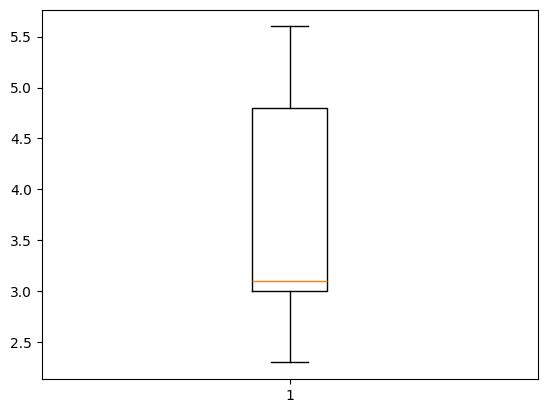

In [87]:
import matplotlib.pyplot as plt

plt.boxplot(df['numerical_feature_1'])
plt.show()

In [94]:
Q1 = df['numerical_feature_1'].quantile(0.25)
Q3 = df['numerical_feature_1'].quantile(0.75)
IQR = Q3 - Q1

df[(df['numerical_feature_1'] > Q1 - (1.5*IQR)) & (df['numerical_feature_1'] < Q3 + (1.5*IQR))]

,multiclass_feature,binary_feature,numerical_feature_1,numerical_feature_2,output_multiclass,output_for_OAT,new_column
0,A,0.0,3.0,7.1,X,0.0,a
1,B,NaN,2.3,8.2,Y,1.0,None
2,C,0.0,3.1,NaN,X,NaN,c
3,A,1.0,4.8,10.4,None,1.0,d
4,B,0.0,5.6,11.5,X,0.0,e


In [95]:
arr = np.random.randint(0, 100, size=5)
arr[(arr > np.percentile(arr, 1)) & (arr < np.percentile(arr, 99))]

array([11, 14, 17])